In [1]:
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
import copy
import igraph as ig
import os
os.chdir('../')

C:\Users\hoang\miniconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


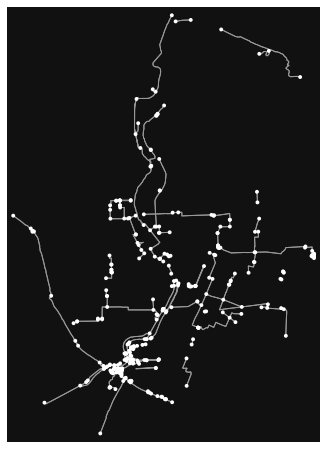

In [3]:
from roc_bike_growth.loader import POI_graph_from_polygon, bike_infra_from_polygon, carall_from_polygon
rochester = ox.geocode_to_gdf('rochester, ny').geometry[0]
POIs = POI_graph_from_polygon(rochester)
bike_infra = bike_infra_from_polygon(rochester)
fig, ax = ox.plot.plot_graph(bike_infra)

Exception at Port of Rochester, Lake Ave . This point will be dropped:
 Nominatim could not geocode query "Port of Rochester, Lake Ave  rochester ny"
Exception at 810-846 N GOODMAN ST. This point will be dropped:
 Nominatim could not geocode query "810-846 N GOODMAN ST rochester ny"
Exception at 650-672 E Main St. This point will be dropped:
 Nominatim could not geocode query "650-672 E Main St rochester ny"
Exception at 497-499 S. CLINTON. This point will be dropped:
 Nominatim could not geocode query "497-499 S. CLINTON rochester ny"


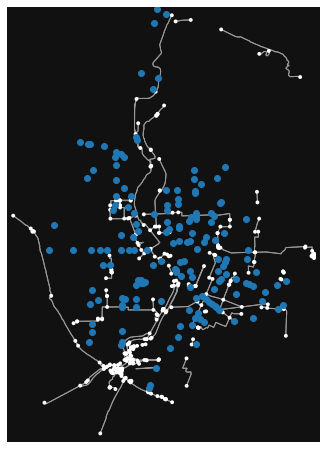

In [4]:
carall = carall_from_polygon(rochester, add_pois=True)
pois = nx.get_node_attributes(carall, 'poi').keys()
# Plot POIs on graph
x, y = [], []
for node in pois:
    d = carall.nodes()[node]
    x.append(d['x'])
    y.append(d['y'])
ax.scatter(x,y)
fig

In [8]:
import roc_bike_growth.graph_utils as gu 
import roc_bike_growth.paper_gt
from roc_bike_growth.paper_gt import gt_from_scratch
from roc_bike_growth.paper_gt import gt_with_existing_full


In [9]:
rg_nx = gt_with_existing_full(carall, bike_infra , route_factor = 1, prune_factor = 0.5)

d:\work\grad\y1s2\capstone\project\roc-bike-growth\roc_bike_growth\paper_gt.py:23: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  poi_nodes.append(G.get_shortest_paths(v, pois_indices[c:], output="vpath"))
d:\work\grad\y1s2\capstone\project\roc-bike-growth\roc_bike_growth\paper_gt.py:24: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  poi_edges.append(G.get_shortest_paths(v, pois_indices[c:], output="epath"))


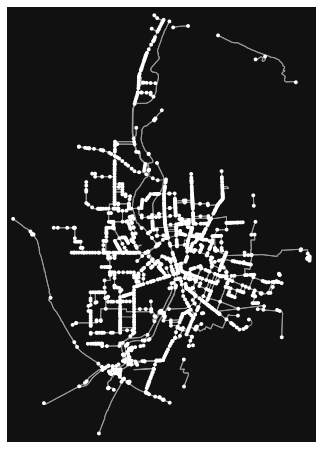

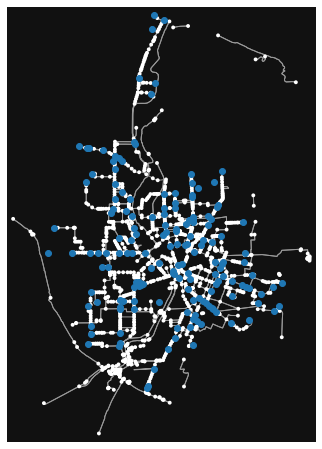

In [10]:
fig, ax = ox.plot.plot_graph(rg_nx)
# Plot POIs on graph
x, y = [], []
for node in pois:
    d = carall.nodes()[node]
    x.append(d['x'])
    y.append(d['y'])
ax.scatter(x,y)
fig

d:\work\grad\y1s2\capstone\project\roc-bike-growth\roc_bike_growth\paper_gt.py:23: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  poi_nodes.append(G.get_shortest_paths(v, pois_indices[c:], output="vpath"))
d:\work\grad\y1s2\capstone\project\roc-bike-growth\roc_bike_growth\paper_gt.py:24: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  poi_edges.append(G.get_shortest_paths(v, pois_indices[c:], output="epath"))


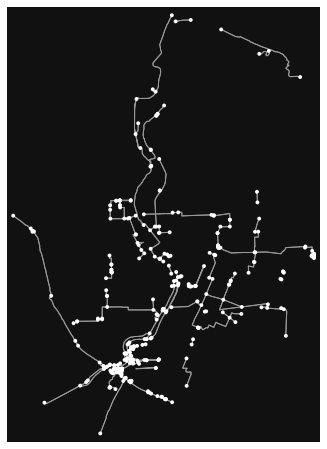

d:\work\grad\y1s2\capstone\project\roc-bike-growth\roc_bike_growth\paper_gt.py:23: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  poi_nodes.append(G.get_shortest_paths(v, pois_indices[c:], output="vpath"))
d:\work\grad\y1s2\capstone\project\roc-bike-growth\roc_bike_growth\paper_gt.py:24: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  poi_edges.append(G.get_shortest_paths(v, pois_indices[c:], output="epath"))


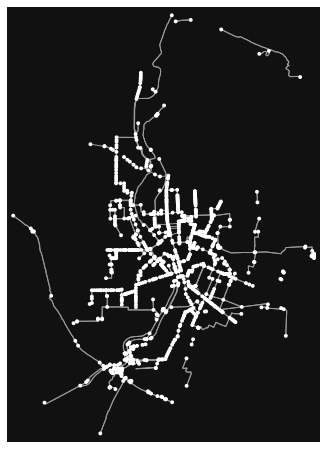

d:\work\grad\y1s2\capstone\project\roc-bike-growth\roc_bike_growth\paper_gt.py:23: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  poi_nodes.append(G.get_shortest_paths(v, pois_indices[c:], output="vpath"))
d:\work\grad\y1s2\capstone\project\roc-bike-growth\roc_bike_growth\paper_gt.py:24: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  poi_edges.append(G.get_shortest_paths(v, pois_indices[c:], output="epath"))


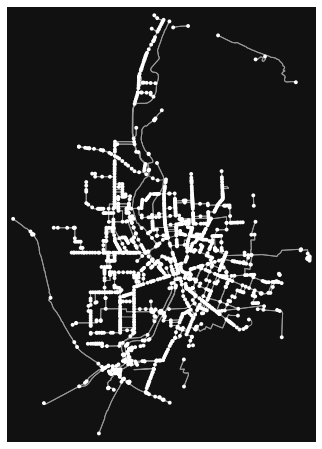

d:\work\grad\y1s2\capstone\project\roc-bike-growth\roc_bike_growth\paper_gt.py:23: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  poi_nodes.append(G.get_shortest_paths(v, pois_indices[c:], output="vpath"))
d:\work\grad\y1s2\capstone\project\roc-bike-growth\roc_bike_growth\paper_gt.py:24: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  poi_edges.append(G.get_shortest_paths(v, pois_indices[c:], output="epath"))


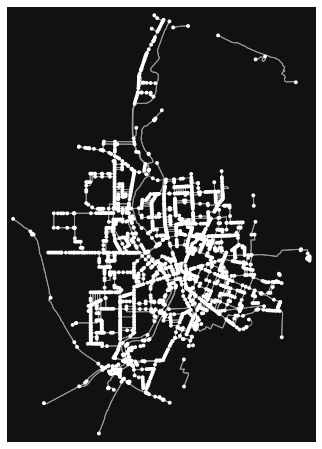

d:\work\grad\y1s2\capstone\project\roc-bike-growth\roc_bike_growth\paper_gt.py:23: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  poi_nodes.append(G.get_shortest_paths(v, pois_indices[c:], output="vpath"))
d:\work\grad\y1s2\capstone\project\roc-bike-growth\roc_bike_growth\paper_gt.py:24: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:368
  poi_edges.append(G.get_shortest_paths(v, pois_indices[c:], output="epath"))


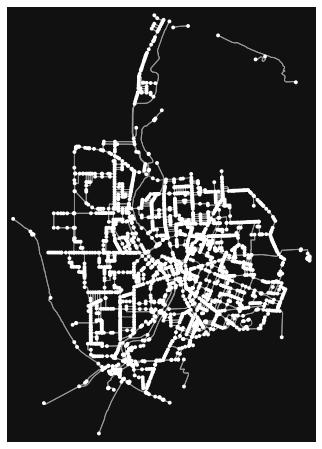

In [11]:
#comparing graphs  with different prune factors
fig, ax = ox.plot.plot_graph(gt_with_existing_full(carall, bike_infra , route_factor = 0, prune_factor = 0))
fig, ax = ox.plot.plot_graph(gt_with_existing_full(carall, bike_infra , route_factor = 0, prune_factor = 0.25))
fig, ax = ox.plot.plot_graph(gt_with_existing_full(carall, bike_infra , route_factor = 0, prune_factor = 0.5))
fig, ax = ox.plot.plot_graph(gt_with_existing_full(carall, bike_infra , route_factor = 0, prune_factor = 0.75))
fig, ax = ox.plot.plot_graph(gt_with_existing_full(carall, bike_infra , route_factor = 0, prune_factor = 1))


/home/jovyan/work/Projects/bike_project/roc-bike-growth-main/roc_bike_growth/paper_gt.py:23: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:367
  poi_nodes.append(G.get_shortest_paths(v, pois_indices[c:], output="vpath"))
/home/jovyan/work/Projects/bike_project/roc-bike-growth-main/roc_bike_growth/paper_gt.py:24: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:367
  poi_edges.append(G.get_shortest_paths(v, pois_indices[c:], output="epath"))


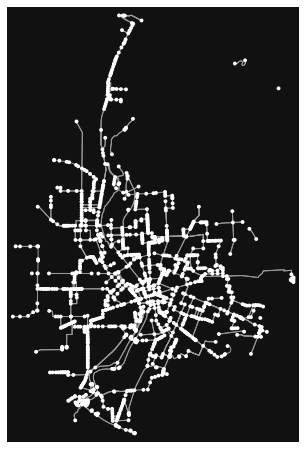

/home/jovyan/work/Projects/bike_project/roc-bike-growth-main/roc_bike_growth/paper_gt.py:23: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:367
  poi_nodes.append(G.get_shortest_paths(v, pois_indices[c:], output="vpath"))
/home/jovyan/work/Projects/bike_project/roc-bike-growth-main/roc_bike_growth/paper_gt.py:24: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:367
  poi_edges.append(G.get_shortest_paths(v, pois_indices[c:], output="epath"))


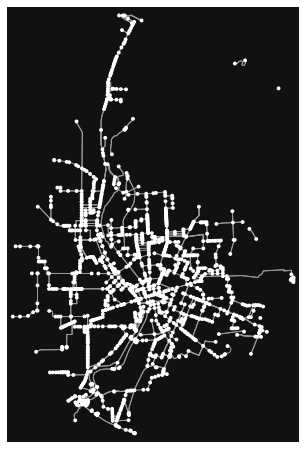

In [15]:
#comparing graphs  with different route factors
fig, ax = ox.plot.plot_graph(gt_with_existing_full(carall, bike_infra , route_factor = 0.5, prune_factor = 0.5))
fig, ax = ox.plot.plot_graph(gt_with_existing_full(carall, bike_infra , route_factor = 0, prune_factor = 0.5))

<AxesSubplot:>

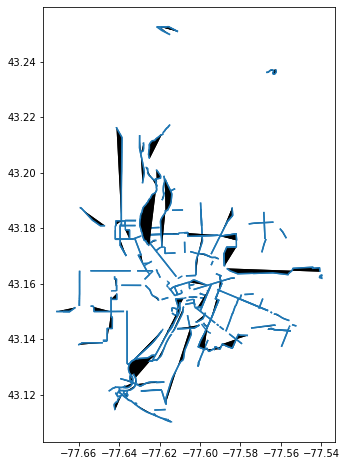

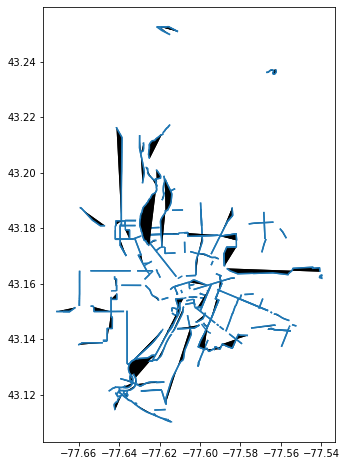

In [9]:
nodes, edges = ox.graph_to_gdfs(rg_nx)

# Plot the nodes
fig, ax = plt.subplots(figsize=(12,8))
edges.plot(ax=ax, facecolor='black')

nodes, edges = ox.graph_to_gdfs(bike_infra)
fig, ax = plt.subplots(figsize=(12,8))
edges.plot(ax=ax, facecolor='black')
